# Translation

In [255]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

def showGraf(matrix, file=0):
    temp= np.array(matrix.tolist()).astype(np.float64)
    fig = plt.figure()
    plt.plot(temp[0], temp[1])
    plt.plot([0,0],[0,20])
    plt.plot([0,20], [0,0])
    plt.xlim(-1,20)
    plt.ylim(-1,14)
    plt.grid()
    if (file != 0):
        print("SaveFig")
        plt.savefig("linfigs/" + str(file))
        
def converter(matrix, datatype=np.float64):
    return np.array(matrix.tolist()).astype(datatype)

In [28]:
# Data points.
Data = Matrix([[1,1], [1,3], [2,4], [3, 3], [3,1], [1,1]])
Data = Matrix([[1,1,2,3,3,1],
               [1,3,4,3,1,1]])
Data

Matrix([
[1, 1, 2, 3, 3, 1],
[1, 3, 4, 3, 1, 1]])

SaveFig


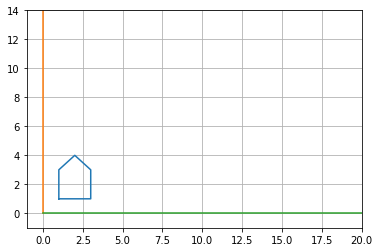

In [259]:
showGraf(Data, file= "Oginal.svg")

Matrix([[1, 1, 2, 3, 3, 1], [1, 3, 4, 3, 1, 1]])
Matrix([[9.00000000000000, 9.00000000000000, 10.0000000000000, 11.0000000000000, 11.0000000000000, 9.00000000000000], [6.00000000000000, 8.00000000000000, 9.00000000000000, 8.00000000000000, 6.00000000000000, 6.00000000000000]])
SaveFig


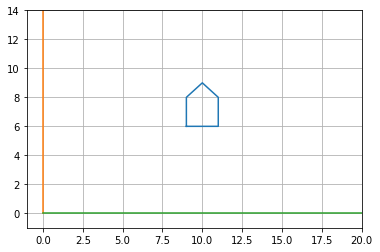

In [260]:
dx = 8
dy = 5
test = np.array(Data.tolist()).astype(np.float64) #Matrix([[dx],[dy]])
TransMatrix = Matrix([test[0] + dx,test[1] + dy])
print(str(Data))
print(str(TransMatrix))
showGraf(TransMatrix, file= "Translate2D.svg")

In [ ]:
# other way to solve translation.


# Scaling in 2D

SaveFig


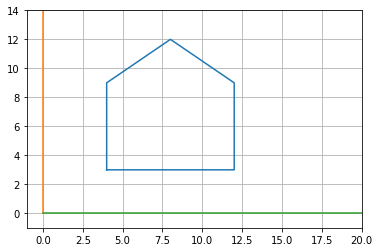

In [262]:
Sx = 4
Sy = 3
ScalingMatrix = Matrix([[Sx, 0],
                 [0, Sy]])
Res = ScalingMatrix * Data
showGraf(Res, file = "Scaling2D.svg")

# Rotating abut orign

Matrix([[0.866025403784439, -0.500000000000000], [0.500000000000000, 0.866025403784439]])
SaveFig


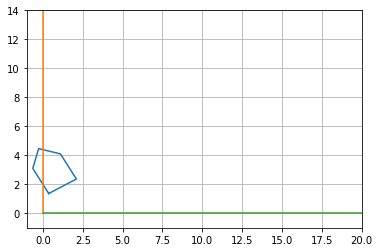

In [263]:
angle = np.deg2rad(30)
RotatingMatrix = Matrix([[cos(angle), -sin(angle)],
                        [sin(angle),  cos(angle)]])
print(str(RotatingMatrix))
temp = RotatingMatrix * Data 
showGraf(temp, file= "Rotate.svg")

# Shearing in 2D

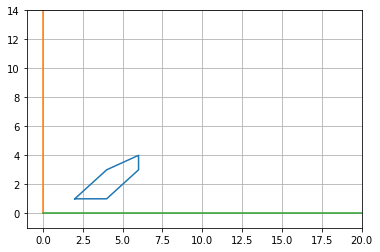

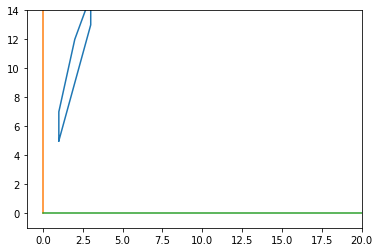

In [264]:
a = 1
b = 4
Sa = Matrix([[1 , a], [0 , 1]])
Sb = Matrix([[1, 0], [b, 1]])
SaData = Sa*Data
SbData = Sb*Data
showGraf(SaData)
showGraf(SbData)
plt.grid()
plt.savefig("linfigs/Sering2D.svg")

# Experement.
What happens if we multiply the 2 of the matrixes forexample rotation and shering.

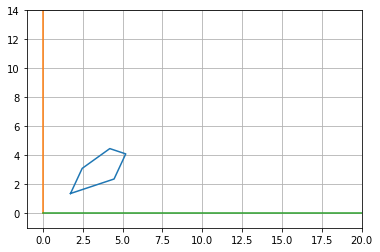

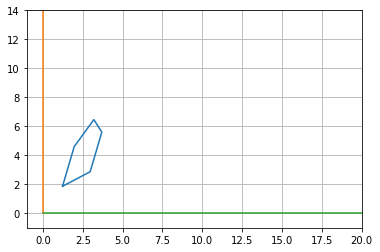

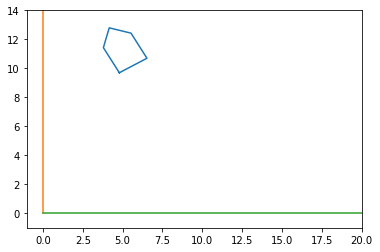

In [265]:
experment1 = Sa*RotatingMatrix*Data
experment2 = RotatingMatrix*Sa*Data
experment3 = RotatingMatrix*TransMatrix
#print(str(experment3))
showGraf(experment1)
showGraf(experment2)
showGraf(experment3)
plt.grid()
plt.savefig("linfigs/Experiment.svg")

# So how about rotating an object in place.
This is perhaps done by firs translate the objet down so that midle of the object is in origo then turning the object arund and finaly re translate the object to its former location.

[[ 1.  1.  2.  3.  3.  1.]
 [ 1.  3.  4.  3.  1.  1.]]
Matrix([[-1.00000000000000, -1.00000000000000, 0.0, 1.00000000000000, 1.00000000000000, -1.00000000000000], [-1.00000000000000, 1.00000000000000, 2.00000000000000, 1.00000000000000, -1.00000000000000, -1.00000000000000]])
How many degres do you want to rotate the figure? 40
Matrix([[-0.123256833432439, -1.40883205280552, -1.28557521937308, 0.123256833432439, 1.40883205280552, -0.123256833432439], [-1.40883205280552, 0.123256833432439, 1.53208888623796, 1.40883205280552, -0.123256833432439, -1.40883205280552]])


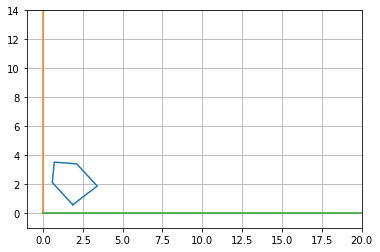

In [266]:
# The distance to the center of the object
distx=2
disty=2
# Translate the object down to origo.
temp = converter(Data)
print(str(temp))
Tr = Matrix([temp[0] - distx, temp[1] - disty])
print(str(Tr))
# Rotate the matrix 180 degrees
ang = np.deg2rad(int(input("How many degres do you want to rotate the figure? ")))
Rot = Matrix([[cos(ang), -sin(ang)],
              [sin(ang), cos(ang)]])
Tr_Rot = Rot*Tr
print(str(Tr_Rot))
# Translate back to the orginal posision.
temp2 = converter(Tr_Rot)
Tr2 = Matrix([temp2[0] + distx, temp2[1] + disty])
showGraf(Tr2)

# So ho about a robotic arm?
In this case we don't want to define the arm the cartesian system. Rader i use an polar system to generate the cartesian system.

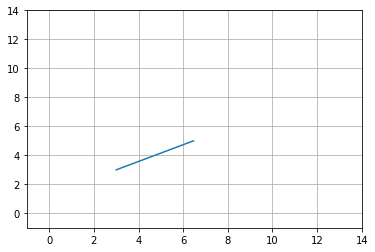

In [174]:
def arm(posx, posy, angle, length):
    ''' Returns an a matrix that contains all points in an figrue'''
    a = np.deg2rad(angle)
    x = length * cos(a)
    y = length * sin(a)
    return Matrix([[posx, x + posx],[posy ,y + posy]])

showGraf(arm(3,3,30,4))

pos x,y=3.0, 3.0
Matrix([[0.0, 3.46410161513775], [0.0, 2.00000000000000]])
[[ 0.  4.]
 [ 0.  0.]]
Matrix([[3.00000000000000, 7.00000000000000], [6.00000000000000, 8.00000000000000]])


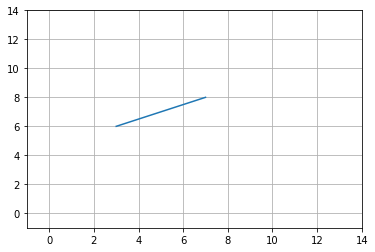

In [193]:
# So i can create an arm vector se about rotating the arm vector.
# An arm have rotates around the base so i move the base to origo and rotate from ther
def armRot(matrix, angle = 0):
    ''' This function takes an arm vector and rotates the arm around the first x,y in the arm matrix'''
    temp = converter(matrix)
    x = temp[0][0]
    y = temp[1][0]
    print("pos x,y=" + str(x) + ", " + str(y))
    # translate down to origo
    tr = Matrix([temp[0] - x, temp[1] - y])
    print(str(tr))
    # Rotate.
    a = np.deg2rad(angle)
    rot = Matrix([[cos(a), -sin(a)],
                  [sin(a), cos(a)]])
    tr_rot = rot * tr
    # Translate back to the orginal
    temp2 = converter(tr_rot)
    print(str(temp2))
    temp3 = Matrix([temp2[0] + x, temp[1] + y])
    print(str(temp3))
    return temp3
    
showGraf(armRot(arm(3,3,30,4), -30))